In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from fatiando import mesher, gravmag

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
import coord as co
import elipsoids as el

### Define a set of geodetic cordinates

In [3]:
latitude_min = -22
latitude_max = -7
longitude_min = -50
longitude_max = -35

In [4]:
N_latitude = 100
N_longitude = 100

In [5]:
latitude = np.linspace(latitude_min, latitude_max, N_latitude)
longitude = np.linspace(longitude_min, longitude_max, N_longitude)

In [6]:
latitude, longitude = np.meshgrid(latitude, longitude)

In [7]:
latitude = np.ravel(latitude)
longitude = np.ravel(longitude)

In [8]:
latitude

array([-22.        , -21.84848485, -21.6969697 , ...,  -7.3030303 ,
        -7.15151515,  -7.        ])

In [9]:
longitude

array([-50., -50., -50., ..., -35., -35., -35.])

In [10]:
central_latitude = 0.5*(latitude_max + latitude_min)
central_longitude = 0.5*(longitude_max + longitude_min)

In [11]:
elipsoid_surface = np.zeros_like(latitude)

In [12]:
# orthometric height of the observations
hP = elipsoid_surface + 500

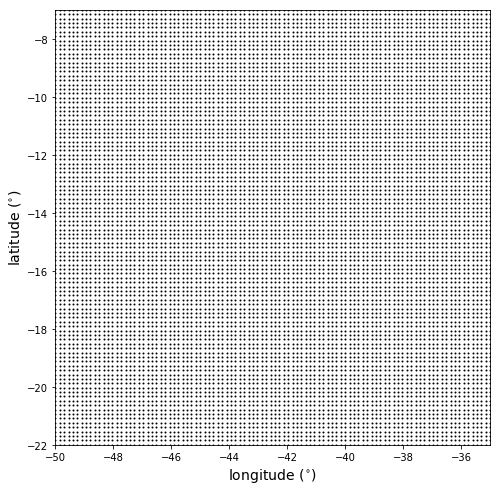

In [13]:
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.plot(longitude, latitude, 'k.', markersize=2)
plt.xlim(longitude_min, longitude_max)
plt.ylim(latitude_min, latitude_max)
plt.xlabel('longitude ($^{\circ}$)', fontsize=14)
plt.ylabel('latitude ($^{\circ}$)', fontsize=14)
plt.show()

### Transform the geodetic coordinates into topocentric Cartesian coordinates

In [14]:
# semimajor axis and flattening
a, f = el.WGS84()

In [15]:
# semiminor axis
b = a*(1 - f)

In [16]:
# Cartesian coordinates of the observations
xP, yP, zP = co.GGC2TCC(0, central_latitude, central_longitude, 
                        hP, latitude, longitude, a, b)

In [17]:
xP_min = np.min(xP)
xP_max = np.max(xP)
yP_min = np.min(yP)
yP_max = np.max(yP)

In [18]:
# Cartesian coordinates of the reference elipsoid surface
xQ, yQ, zQ = co.GGC2TCC(0, central_latitude, central_longitude, 
                        elipsoid_surface, latitude, longitude, a, b)

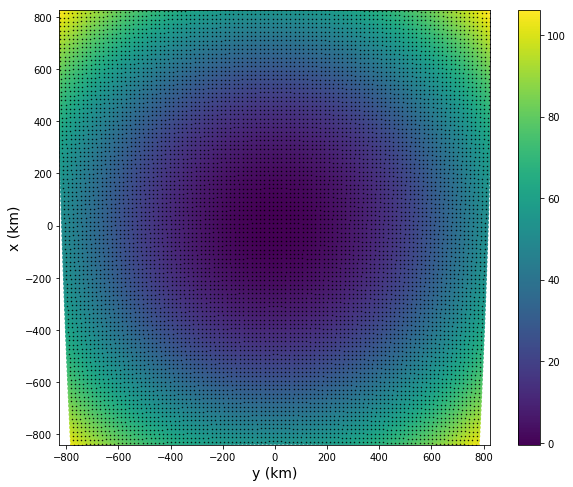

In [55]:
plt.figure(figsize=(10,8))
plt.axis('scaled')
plt.scatter(0.001*yP, 0.001*xP, c=0.001*zP, marker='o', cmap=plt.get_cmap('viridis'))
plt.colorbar()
plt.plot(0.001*yP, 0.001*xP, 'k.', markersize=1)
plt.xlim(0.001*yP_min, 0.001*yP_max)
plt.ylim(0.001*xP_min, 0.001*xP_max)
plt.xlabel('y (km)', fontsize=14)
plt.ylabel('x (km)', fontsize=14)
plt.show()